In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

# Display the data table for preview


In [3]:
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
rides=ride.merge(city,how="left",left_on="city",right_on="city")


In [6]:
rides.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

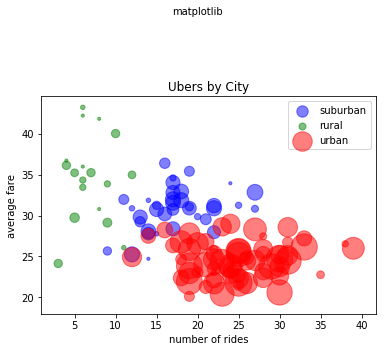

In [7]:
# Obtain the x and y coordinates for each of the three city types

urban=rides[rides['type']=="Urban"]


suburban=rides[rides['type']=="Suburban"]


rural=rides[rides['type']=="Rural"]


xu=urban.groupby(["city"]).count()["ride_id"]
yu=urban.groupby(["city"]).mean()["fare"]
zu=urban.groupby(["city"]).mean()["driver_count"]

xs=suburban.groupby(["city"]).count()["ride_id"]
ys=suburban.groupby(["city"]).mean()["fare"]
zs=suburban.groupby(["city"]).mean()["driver_count"]

xr=rural.groupby(["city"]).count()["ride_id"]
yr=rural.groupby(["city"]).mean()["fare"]
zr=rural.groupby(["city"]).mean()["driver_count"]




# Build the scatter plots for each city types
plt.scatter(xs, ys, s=zs*10, alpha=0.5, color="b",label="suburban")
plt.scatter(xr, yr, s=zr*10, alpha=0.5, color="g",label="rural")
plt.scatter(xu, yu, s=zu*10, alpha=0.5, color="r",label="urban")


# Incorporate the other graph properties
plt.xlabel("number of rides")

plt.ylabel("average fare")
plt.title("Ubers by City")
# Create a legend
plt.legend()

# Incorporate a text label regarding circle size
plt.text(20, 55, 'matplotlib', horizontalalignment='center',      verticalalignment='center')
# Save Figure
plt.show

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'Fares by City Type')

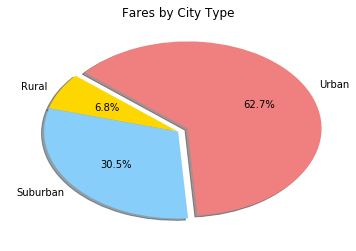

In [11]:
# Calculate Driver Percents
# total Fares
total_fares = rides['fare'].sum()
# fares per type
groupedby_type = rides.groupby('type')
fares_per_type = groupedby_type.fare.sum()
percent_fares_per_type = (fares_per_type * 100) / total_fares


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [6.8, 30.5, 62.7]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_fares_per_type.png")

# Title
plt.title('Fares by City Type')

# Make it a circle
#plt.axis("equal")

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'Rides by City Type')

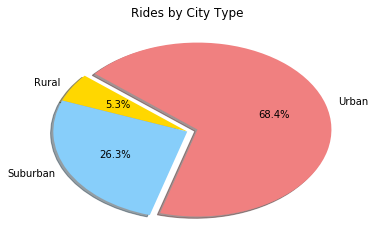

In [13]:

# Calculate Type Percents
# total rides
total_rides = rides['ride_id'].count()
# rides per type
groupedby_type = rides.groupby('type')
rides_per_type = groupedby_type.ride_id.count()
percent_rides_per_type = (rides_per_type * 100) / total_rides


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5.3, 26.3, 68.4]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_rides_per_type.png")

# Title
plt.title('Rides by City Type')

# Make it a circle
#plt.axis("equal")


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'Drivers by City Type')

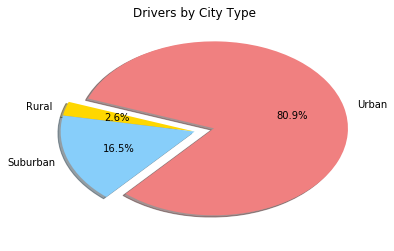

In [17]:
# drivers per type
rural_drivers = rural['driver_count'].sum()
suburban_drivers = suburban['driver_count'].sum()
urban_drivers = urban['driver_count'].sum()

# total drivers
total_drivers = rural_drivers + suburban_drivers + urban_drivers

rural_rides_percent = (rural_drivers * 100) / total_drivers
suburban_rides_percent = (suburban_drivers * 100) / total_drivers
urban_rides_percent = (urban_drivers * 100) / total_drivers

# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [2.6, 16.5, 80.9]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.15)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.savefig("pyber_pie_total_drivers_per_type.png")

# Title
plt.title('Drivers by City Type')

# Make it a circle
#plt.axis("equal")

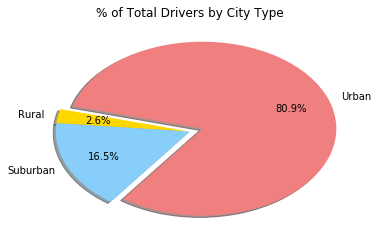

In [6]:
# Show Figure
plt.show()

In [1]:
pwd

'C:\\Users\\alexc\\Documents\\USCLOS201811DATA3\\05_matplotlib\\homework\\Instructions\\Pyber'